In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [2]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

In [4]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

In [5]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

In [8]:
rocs = []
prcs = []

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

## Add code for cross-validation here
for train_index, test_index in skf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # Initialize the logistic regression model without regularization
    model = LogisticRegression(penalty=None, max_iter=10000, solver='lbfgs')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class (1)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate and store ROC AUC and Average Precision for each fold
    roc_auc = roc_auc_score(y_test, y_probs)
    avg_precision = average_precision_score(y_test, y_probs)
    rocs.append(roc_auc)
    prcs.append(avg_precision)

## Report AUROC and average precision here
mean_roc_auc = np.mean(rocs)
mean_avg_precision = np.mean(prcs)

print("Average Area Under ROC Curve (AUROC):", mean_roc_auc)
print("Average Precision Score:", mean_avg_precision)

Average Area Under ROC Curve (AUROC): 0.6817879948914431
Average Precision Score: 0.8699908138213898


In [9]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

## Add code for cross-validation here
# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Loop over each C value
for i, c in enumerate(cc):
    # Cross-validation loop
    for j, (train_index, test_index) in enumerate(skf.split(features, labels)):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        # Initialize logistic regression model with L2 regularization for each C value
        model = LogisticRegression(penalty='l2', C=c, max_iter=10000, solver='lbfgs')
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict probabilities for the positive class (1)
        y_probs = model.predict_proba(X_test)[:, 1]
        
        # Calculate ROC AUC and Average Precision for each fold
        rocs[i, j] = roc_auc_score(y_test, y_probs)
        prcs[i, j] = average_precision_score(y_test, y_probs)

Highest Average Area Under ROC Curve (AUROC): 0.8678160919540231
Best C for AUROC: 0.001
Highest Average Precision Score: 0.9579983765099549
Best C for Average Precision: 0.001


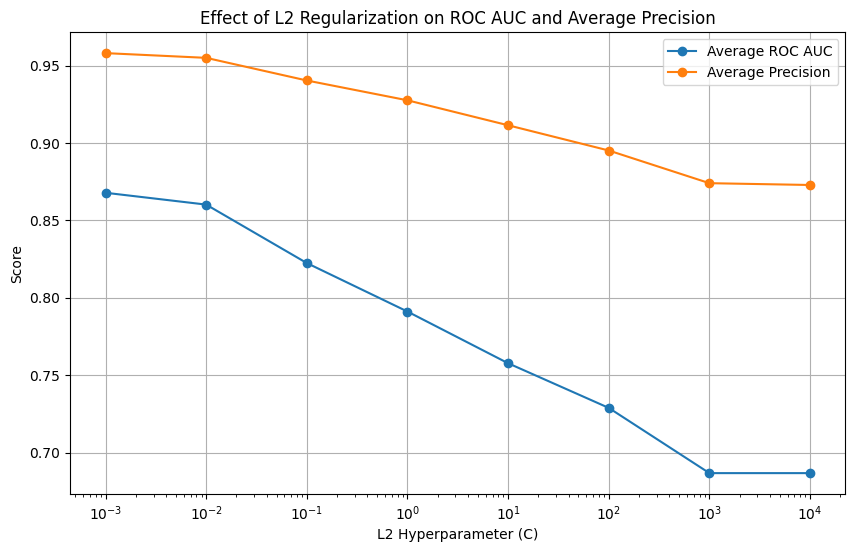

In [10]:
## Compute the average auroc and average average precision for each value of cc
# Compute the average AUROC and average precision for each C
avg_rocs = rocs.mean(axis=1)
avg_prcs = prcs.mean(axis=1)

# Identify the best results
best_roc_auc = np.max(avg_rocs)
best_avg_precision = np.max(avg_prcs)
best_c_roc_auc = cc[np.argmax(avg_rocs)]
best_c_avg_precision = cc[np.argmax(avg_prcs)]

## Report the highest values of the average auroc and average average precision here
# Report the highest values of the average AUROC and average precision
print("Highest Average Area Under ROC Curve (AUROC):", best_roc_auc)
print("Best C for AUROC:", best_c_roc_auc)
print("Highest Average Precision Score:", best_avg_precision)
print("Best C for Average Precision:", best_c_avg_precision)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cc, avg_rocs, label="Average ROC AUC", marker='o')
plt.plot(cc, avg_prcs, label="Average Precision", marker='o')
plt.xscale('log')
plt.xlabel("L2 Hyperparameter (C)")
plt.ylabel("Score")
plt.title("Effect of L2 Regularization on ROC AUC and Average Precision")
plt.legend()
plt.grid(True)
plt.show()